## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear  
Firstly, our derivation of Eq. gives us  
$\frac{\partial L}{\partial w} = - \sum_{x^i} y^ix^i$  
$\frac{\partial L}{\partial b} = - \sum_{x^i} y^i$  
And then we use it to update our parameters by multiplying with learning rate $\eta$  
$W_{y^i} = W_{y^i} + \eta y^ix^i$  
$b_{y^i} = b_{y^i} + \eta y^i$  
Therefore, if the datapoint is classified correctly, the $W_{y^i}$ and $b_{y^i}$ will become larger. Otherwise, it will become smaller. Finally, we can get a trained perceptron model.  
#################################
                              
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [19]:
class MultiClsPLA(object):

    ## We recommend to absorb the bias into weight.  W = [w, b]

    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []

    def initial_weight(self, weight_dimension, num_cls):
        #########################################
        ##  Initialize the weight with         ##
        ##  small std and zero mean gaussian   ##
        #########################################
        weight = np.random.normal(0, 0.01, (weight_dimension + 1, num_cls))
        return weight

    def data_preprocessing(self, data):
        #####################################
        ##  Normalize the data              ##
        #####################################
        norm_data = (data - self.sample_mean) / self.sample_std
        return norm_data

    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]

        # Append a column of ones to the end of X_train for the bias term
        X_train_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))

        for i in range(X_train.shape[0]):
            xi = X_train_bias[i]
            yi = y_train[i]
            yi_pred = np.argmax(np.dot(xi, self.weight))
            if yi_pred != yi:
                self.weight[:, yi] += self.lr * xi
                self.weight[:, yi_pred] -= self.lr * xi

        # Calculate training accuracy
        pred_train = np.argmax(np.dot(X_train_bias, self.weight), axis=1)
        train_acc = np.mean(pred_train == y_train)
        return train_acc

    def test_step(self, X_test, y_test):
        X_test = self.data_preprocessing(data=X_test)
        
        # Append a column of ones to the end of X_test for the bias term
        X_test_bias = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
        
        pred_test = np.argmax(np.dot(X_test_bias, self.weight), axis=1)
        test_acc = np.mean(pred_test == y_test)
        
        return test_acc

    def train(self):
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]

        ######################################################
        ### In order to absorb the bias into weights       ###
        ### we need to modify the input data.              ###
        ######################################################
         
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test, y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'training_acc:%.3f' % training_acc, 'test_acc:%.3f' % tst_acc)

    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        test_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(test_acc)
        plt.legend(['train_acc', 'test_acc'])
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Test Accuracy over Epochs')
        plt.show()

epoch: 0 training_acc:0.917 test_acc:0.900
epoch: 1 training_acc:0.933 test_acc:0.967
epoch: 2 training_acc:0.950 test_acc:0.933
epoch: 3 training_acc:0.958 test_acc:0.967
epoch: 4 training_acc:0.967 test_acc:0.967
epoch: 5 training_acc:0.933 test_acc:0.933
epoch: 6 training_acc:0.950 test_acc:0.933
epoch: 7 training_acc:0.967 test_acc:0.967
epoch: 8 training_acc:0.975 test_acc:0.967
epoch: 9 training_acc:0.900 test_acc:0.900
epoch: 10 training_acc:0.975 test_acc:0.933
epoch: 11 training_acc:0.975 test_acc:0.967
epoch: 12 training_acc:0.967 test_acc:0.967
epoch: 13 training_acc:0.958 test_acc:0.967
epoch: 14 training_acc:0.967 test_acc:0.967
epoch: 15 training_acc:0.958 test_acc:1.000
epoch: 16 training_acc:0.975 test_acc:0.967
epoch: 17 training_acc:0.950 test_acc:0.967
epoch: 18 training_acc:0.967 test_acc:1.000
epoch: 19 training_acc:0.958 test_acc:0.967
epoch: 20 training_acc:0.983 test_acc:0.967
epoch: 21 training_acc:0.983 test_acc:0.967
epoch: 22 training_acc:0.983 test_acc:0.96

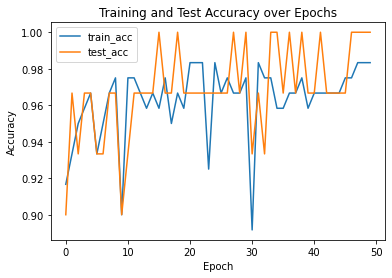

In [22]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches

# Parameters
lr = 0.001          # learning rate
num_epoch = 50     # number of epochs
weight_dimension = X_train.shape[1]  # number of features
num_cls = len(np.unique(y))          # number of classes

# Initialize and train the MultiClsPLA model
model = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)
model.train()

# Visualize the training accuracy and test accuracy versus epochs
model.vis_acc_curve()
